<a href="https://colab.research.google.com/github/MichaelTriesCoding/Assignments/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

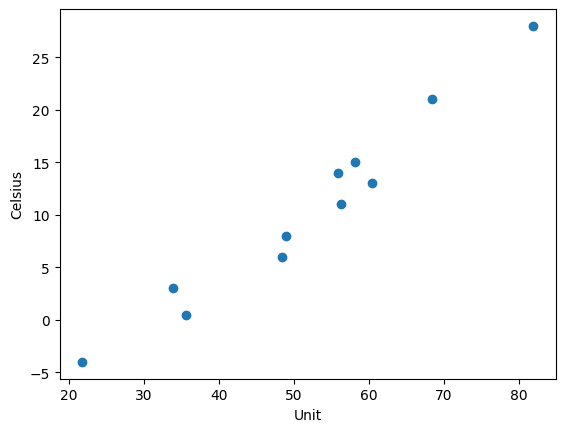

Start of SGD:
Learning rate: 0.1
Epoch: 500, Training Loss: nan, Validation Loss: nan
Epoch: 1000, Training Loss: nan, Validation Loss: nan
Epoch: 1500, Training Loss: nan, Validation Loss: nan
Epoch: 2000, Training Loss: nan, Validation Loss: nan
Epoch: 2500, Training Loss: nan, Validation Loss: nan
Epoch: 3000, Training Loss: nan, Validation Loss: nan
Epoch: 3500, Training Loss: nan, Validation Loss: nan
Epoch: 4000, Training Loss: nan, Validation Loss: nan
Epoch: 4500, Training Loss: nan, Validation Loss: nan
Epoch: 5000, Training Loss: nan, Validation Loss: nan
Learning rate: 0.01
Epoch: 500, Training Loss: nan, Validation Loss: nan
Epoch: 1000, Training Loss: nan, Validation Loss: nan
Epoch: 1500, Training Loss: nan, Validation Loss: nan
Epoch: 2000, Training Loss: nan, Validation Loss: nan
Epoch: 2500, Training Loss: nan, Validation Loss: nan
Epoch: 3000, Training Loss: nan, Validation Loss: nan
Epoch: 3500, Training Loss: nan, Validation Loss: nan
Epoch: 4000, Training Loss: nan

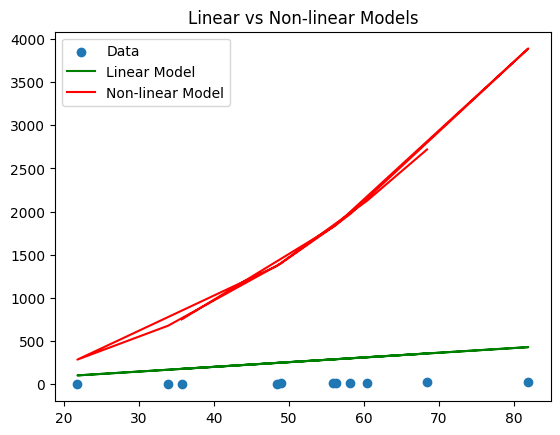

In [57]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Data points for temperature in Celsius and an Unit
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Plot the data points
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.ylabel('Celsius')
plt.xlabel('Unit')
plt.show()

# Split data into training and validation sets
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)  # 20% for validation

# Shuffle indices and create train/validation splits
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Normalize training and validation inputs
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Non-linear model function
def nonLinearModel(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

# Loss function
def loss(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop for non-linear model
def nonLinearTrainingLoop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = nonLinearModel(train_t_u, *params)
        train_loss = loss(train_t_p, train_t_c)

        val_t_p = nonLinearModel(val_t_u, *params)
        val_loss = loss(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Report every 500 epochs
        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Training Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}')

    return params

# Function to train and print results for different learning rates
def train_with_optimizer(optimizer_class, learning_rates, params_template):
    for lr in learning_rates:
        params = torch.tensor(params_template, requires_grad=True)
        optimizer = optimizer_class([params], lr=lr)
        print(f'Learning rate: {lr}')
        nonLinearTrainingLoop(5000, optimizer, params, train_t_un, val_t_un, train_t_c, val_t_c)

# Training with SGD optimizer
print('Start of SGD:')
train_with_optimizer(optim.SGD, [0.1, 0.01, 0.001, 0.0001], [1.0, 1.0, 0.0])

# Training with Adam optimizer
print('End of SGD. Start of Adam:')
train_with_optimizer(optim.Adam, [0.1, 0.01, 0.001, 0.0001], [1.0, 1.0, 0.0])

# Linear model function thrown in
def linearModel(t_u, w, b):
    return w * t_u + b

# Training loop for linear model
def linearTrainingLoop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = linearModel(train_t_u, *params)
        train_loss = loss(train_t_p, train_t_c)

        val_t_p = linearModel(val_t_u, *params)
        val_loss = loss(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Report every 500 epochs
        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Training Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}')

    return params

# Train and compare linear vs non-linear models
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
non_linear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

linear_optimizer = optim.SGD([linear_params], lr=0.01)
non_linear_optimizer = optim.Adam([non_linear_params], lr=0.0001)

linear_params_trained = linearTrainingLoop(5000, linear_optimizer, linear_params, train_t_un, val_t_un, train_t_c, val_t_c)
non_linear_params_trained = nonLinearTrainingLoop(5000, non_linear_optimizer, non_linear_params, train_t_un, val_t_un, train_t_c, val_t_c)

t_p_linear = linearModel(t_u, *linear_params_trained).detach().numpy()
t_p_nonLinear = nonLinearModel(t_u, *non_linear_params_trained).detach().numpy()

# Plot comparison of linear and non-linear models
plt.scatter(t_u, t_c, label='Data')
plt.plot(t_u, t_p_linear, color='green', label='Linear Model')
plt.plot(t_u, t_p_nonLinear, color='red', label='Non-linear Model')
plt.title('Linear vs Non-linear Models')
plt.legend()
plt.show()


Problem 2

Start of SGD with learning rate: 0.1
Epoch: 500, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 1000, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 1500, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 2000, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 2500, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 3000, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 3500, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 4000, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 4500, Training Loss: 0.433129, Validation Loss: 0.467627
Epoch: 5000, Training Loss: 0.433129, Validation Loss: 0.467627
Start of SGD with learning rate: 0.01
Epoch: 500, Training Loss: 0.433129, Validation Loss: 0.467587
Epoch: 1000, Training Loss: 0.433128, Validation Loss: 0.467627
Epoch: 1500, Training Loss: 0.433128, Validation Loss: 0.467627
Epoch: 2000, Training Loss: 0.433128, Validation Loss: 0.467627
Epoch: 2500, Training Loss: 0.4

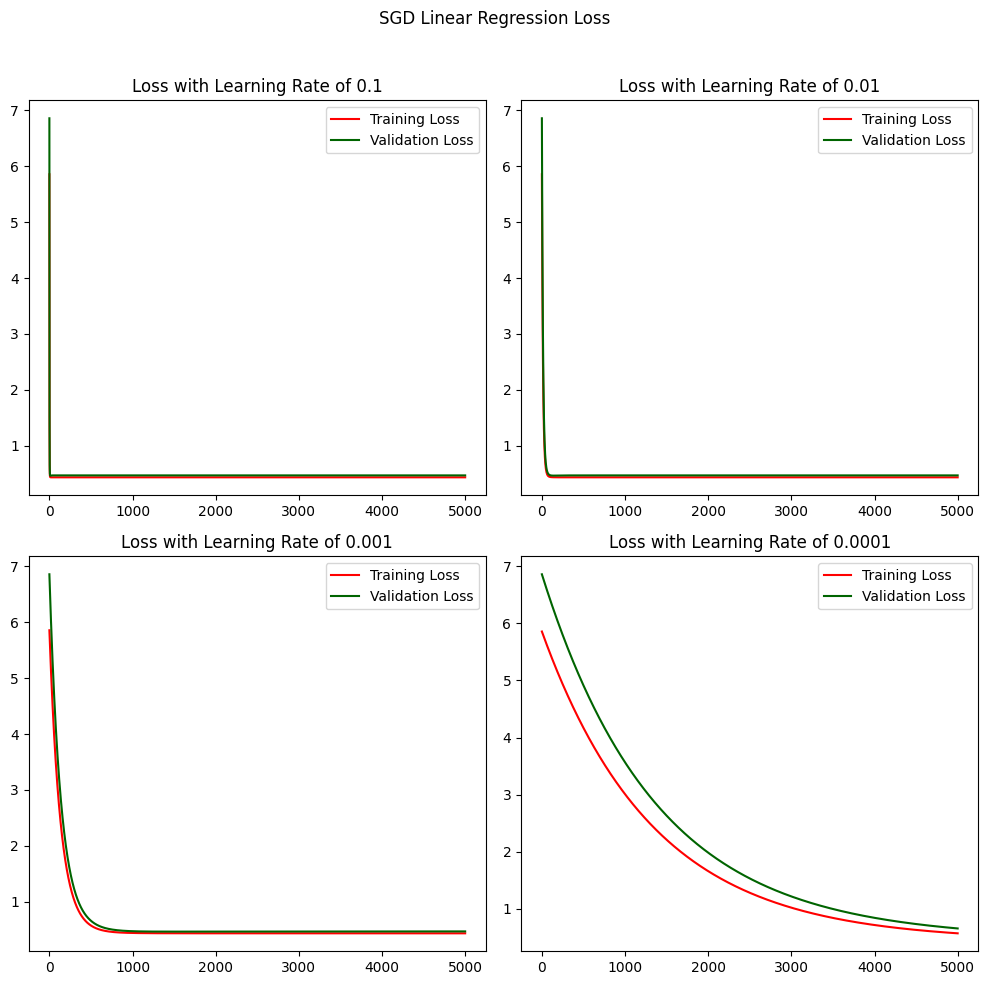

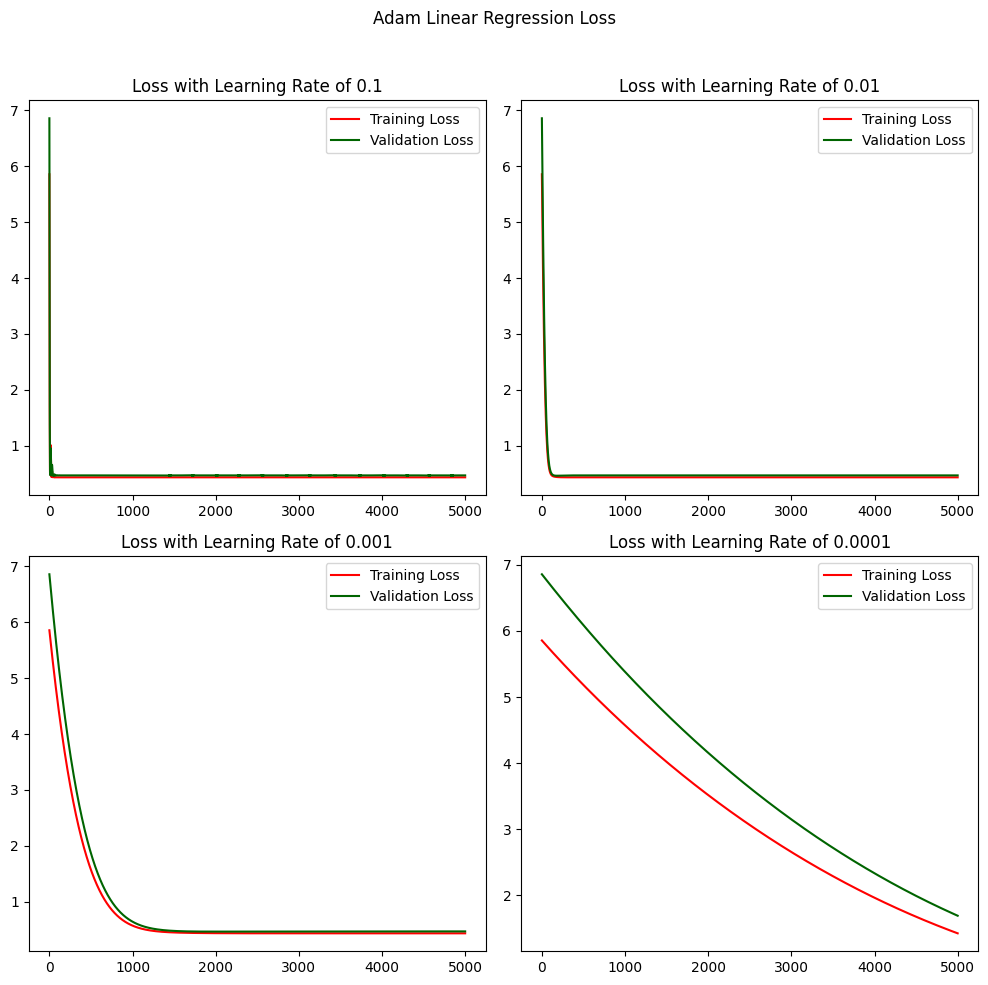

In [66]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in the data
housing = pd.read_csv('Housing.csv')

# Extract input variables and target variable
inputVariables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x = housing[inputVariables].values
y = housing['price'].values

# Standardize the data
scaledXValues = StandardScaler().fit_transform(x)
scaledYValues = StandardScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Convert data to tensors
t_x = torch.tensor(scaledXValues, dtype=torch.float32)
t_y = torch.tensor(scaledYValues, dtype=torch.float32)

# Split data into training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]
val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

# Define the linear model
def linearModel(t_x, params):
    return torch.matmul(t_x, params[:-1]) + params[-1]

# Define the loss function
def loss(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

# Training loop for the linear model
def linearTrainingLoop(n_epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
    trainLosses = []
    validLosses = []

    for epoch in range(1, n_epochs + 1):
        train_t_p = linearModel(train_t_x, params)
        train_loss = loss(train_t_p, train_t_y)

        val_t_p = linearModel(val_t_x, params)
        val_loss = loss(val_t_p, val_t_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        trainLosses.append(train_loss)
        validLosses.append(val_loss)

        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Training Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}')

    return params, trainLosses, validLosses

# Training with SGD optimizer and different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
SGD_trainLosses = []
SGD_validLosses = []

for lr in learning_rates:
    print(f'Start of SGD with learning rate: {lr}')
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    _, trainLoss, validLoss = linearTrainingLoop(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
    SGD_trainLosses.append(np.array([item.detach().item() for item in trainLoss]))
    SGD_validLosses.append(np.array([item.detach().item() for item in validLoss]))

# Training with Adam optimizer and different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
Adam_trainLosses = []
Adam_validLosses = []

for lr in learning_rates:
    print(f'Start of Adam with learning rate: {lr}')
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    _, trainLoss, validLoss = linearTrainingLoop(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
    Adam_trainLosses.append(np.array([item.detach().item() for item in trainLoss]))
    Adam_validLosses.append(np.array([item.detach().item() for item in validLoss]))

# Plotting the results SGD
plt.figure(figsize=(10, 10))
plt.suptitle("SGD Linear Regression Loss")

titles = ['Learning Rate of 0.1', 'Learning Rate of 0.01', 'Learning Rate of 0.001', 'Learning Rate of 0.0001']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(SGD_trainLosses[i], color='red', label='Training Loss')
    plt.plot(SGD_validLosses[i], color='darkgreen', label='Validation Loss')
    plt.title(f'Loss with {titles[i]}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plotting the results for Adam
plt.figure(figsize=(10, 10))
plt.suptitle("Adam Linear Regression Loss")

titles = ['Learning Rate of 0.1', 'Learning Rate of 0.01', 'Learning Rate of 0.001', 'Learning Rate of 0.0001']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(Adam_trainLosses[i], color='red', label='Training Loss')
    plt.plot(Adam_validLosses[i], color='darkgreen', label='Validation Loss')
    plt.title(f'Loss with {titles[i]}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Problem 3

Start of SGD with learning rate: 0.1
Epoch: 500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 1000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 1500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 2000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 2500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 3000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 3500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 4000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 4500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 5000, Training Loss: 0.324857, Validation Loss: 0.345134
Start of SGD with learning rate: 0.01
Epoch: 500, Training Loss: 0.324858, Validation Loss: 0.345253
Epoch: 1000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 1500, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 2000, Training Loss: 0.324857, Validation Loss: 0.345134
Epoch: 2500, Training Loss: 0.3

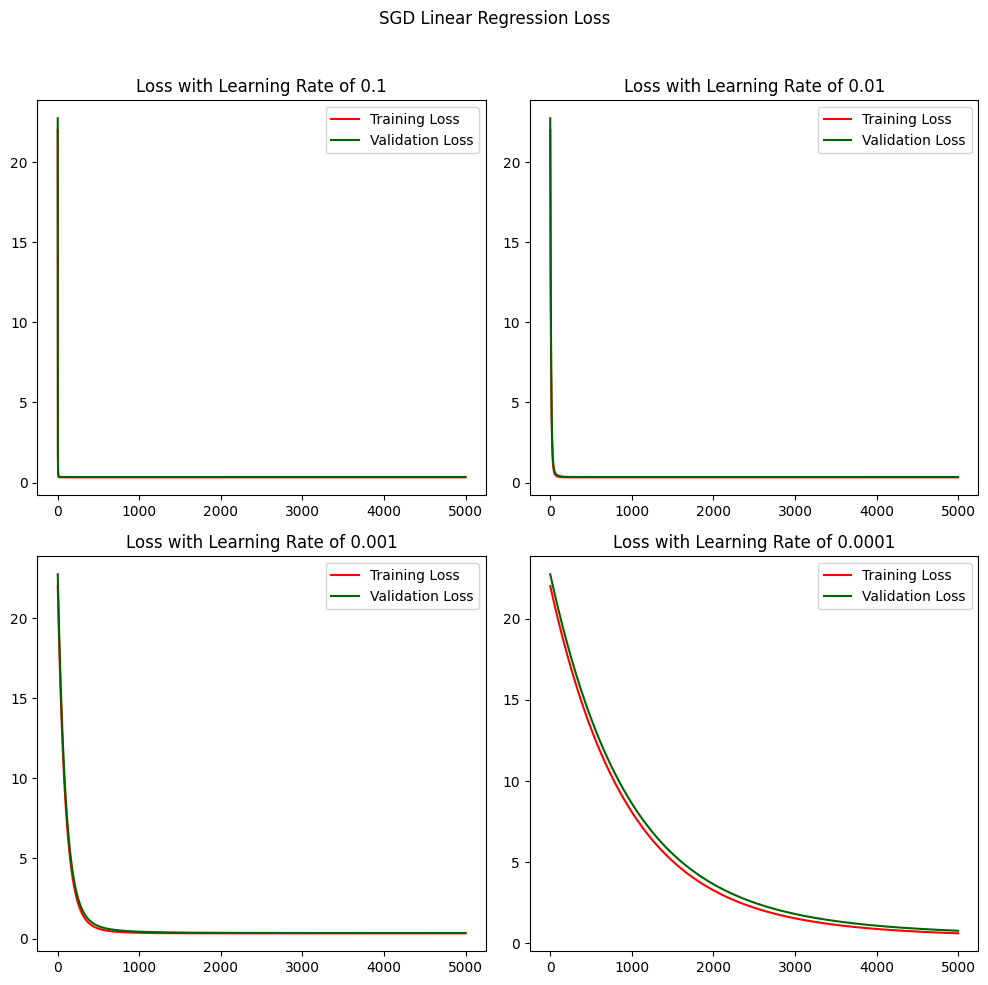

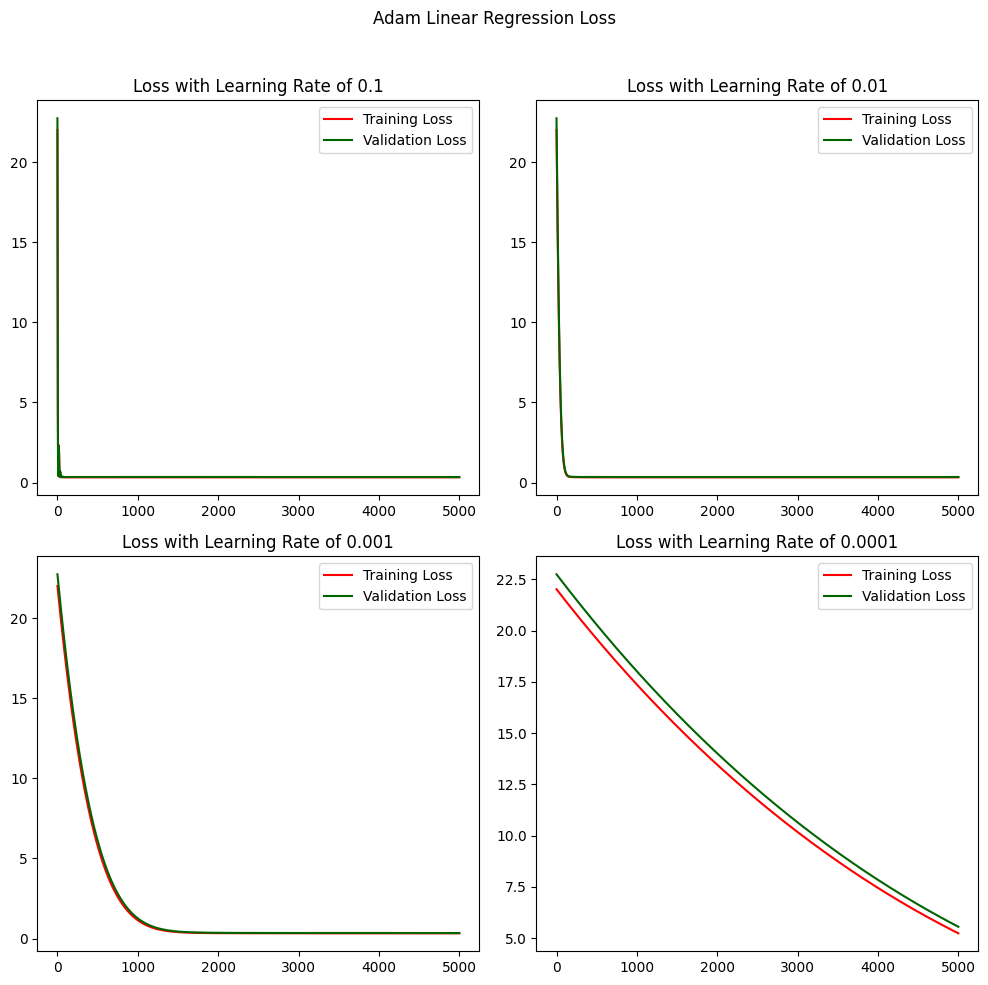

In [67]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in the data
housing = pd.read_csv('Housing.csv')

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

# Extract input variables and target variable
inputVariables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x = housing[inputVariables].values
y = housing['price'].values

# Standardize the data
scaledXValues = StandardScaler().fit_transform(x)
scaledYValues = StandardScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Convert data to tensors
t_x = torch.tensor(scaledXValues, dtype=torch.float32)
t_y = torch.tensor(scaledYValues, dtype=torch.float32)

# Split data into training and validation sets
n_samples = t_x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]
val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

# Define the linear model
def linearModel(t_x, params):
    return torch.matmul(t_x, params[:-1]) + params[-1]

# Define the loss function
def loss(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

# Training loop for the linear model
def linearTrainingLoop(n_epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
    trainLosses = []
    validLosses = []

    for epoch in range(1, n_epochs + 1):
        train_t_p = linearModel(train_t_x, params)
        train_loss = loss(train_t_p, train_t_y)

        val_t_p = linearModel(val_t_x, params)
        val_loss = loss(val_t_p, val_t_y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        trainLosses.append(train_loss)
        validLosses.append(val_loss)

        if epoch % 500 == 0:
            print(f'Epoch: {epoch}, Training Loss: {train_loss:.6f}, Validation Loss: {val_loss:.6f}')

    return params, trainLosses, validLosses

# Training with SGD optimizer and different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
SGD_trainLosses = []
SGD_validLosses = []

for lr in learning_rates:
    print(f'Start of SGD with learning rate: {lr}')
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    _, trainLoss, validLoss = linearTrainingLoop(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
    SGD_trainLosses.append(np.array([item.detach().item() for item in trainLoss]))
    SGD_validLosses.append(np.array([item.detach().item() for item in validLoss]))

# Training with Adam optimizer and different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
Adam_trainLosses = []
Adam_validLosses = []

for lr in learning_rates:
    print(f'Start of Adam with learning rate: {lr}')
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    _, trainLoss, validLoss = linearTrainingLoop(5000, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y)
    Adam_trainLosses.append(np.array([item.detach().item() for item in trainLoss]))
    Adam_validLosses.append(np.array([item.detach().item() for item in validLoss]))

# Plotting the results SGD
plt.figure(figsize=(10, 10))
plt.suptitle("SGD Linear Regression Loss")

titles = ['Learning Rate of 0.1', 'Learning Rate of 0.01', 'Learning Rate of 0.001', 'Learning Rate of 0.0001']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(SGD_trainLosses[i], color='red', label='Training Loss')
    plt.plot(SGD_validLosses[i], color='darkgreen', label='Validation Loss')
    plt.title(f'Loss with {titles[i]}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Plotting the results for Adam
plt.figure(figsize=(10, 10))
plt.suptitle("Adam Linear Regression Loss")

titles = ['Learning Rate of 0.1', 'Learning Rate of 0.01', 'Learning Rate of 0.001', 'Learning Rate of 0.0001']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(Adam_trainLosses[i], color='red', label='Training Loss')
    plt.plot(Adam_validLosses[i], color='darkgreen', label='Validation Loss')
    plt.title(f'Loss with {titles[i]}')
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()